# Absolute beginners EDA using the Data Analysis Baseline Library (dabl)
When we start with the [Titanic competition](https://www.kaggle.com/c/titanic) are are provided with the training data in `train.csv`, but what exactly does this file contain? What does it look like?
What we need to do is what is known as **EDA**, which is short for [exploratory data analysis](https://en.wikipedia.org/wiki/Exploratory_data_analysis). Today we shall use the [dabl package](https://dabl.github.io/) which provides a quick and easy method of data exploration.

First we shall use the `pip` package installer for python to install `dabl`:

In [1]:
!pip install dabl
import dabl

     |████████████████████████████████| 566 kB 401 kB/s 
  Created wheel for dabl: filename=dabl-0.1.9-py3-none-any.whl size=572788 sha256=3ce99cb0ec11a9fba86737d919953ab3a545b76675e22978f76895e31009815f
  Stored in directory: /root/.cache/pip/wheels/aa/38/8f/66d5e159658b37cb0b8f9176a9f584f14bcd5ea0c1e96011bf
Successfully built dabl


we now import [pandas](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html) and read in the `csv` ([comma-separated values](https://en.wikipedia.org/wiki/Comma-separated_values)) file to a [pandas DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html), which I shall name `train_data`:

In [2]:
import pandas as pd
train_data = pd.read_csv('../input/titanic/train.csv')

We can now use `dabl.detect_types` to look at what type of data is contained in each of the columns of this DataFrame

In [3]:
dabl.detect_types(train_data)

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
PassengerId,False,False,False,False,False,False,True
Survived,False,False,False,True,False,False,False
Pclass,False,False,False,True,False,False,False
Name,False,False,False,False,False,True,False
Sex,False,False,False,True,False,False,False
Age,True,False,False,False,False,False,False
SibSp,False,False,True,False,False,False,False
Parch,False,False,True,False,False,False,False
Ticket,False,False,False,False,False,True,False
Fare,True,False,False,False,False,False,False


From this we can see that `Age` and `Fare` are **continuous** features. There are no so-called **dirty floats** (floating point variables that sometimes have string values). There are two **low cardinality integer** features; `SibSp`, which is the number of siblings or spouses aboard, and `Parch`, which is the number of parents or children aboard. 

There are a number of **categorical** features; `Survived`, which is our target (or dependent variable) data whose value we shall learn from, and three independent features: `Pcalss`, which is the ticket class (1 = 1st class, 2 = 2nd class, and 3 = 3rd class), `Sex`, and finally `Embarked`, which is the port of embarkation (`C` = Cherbourg, `Q` = Queenstown, `S` = Southampton). There are no **date** types, which are associated with time series data.

**Free_string** shows that `Name`, `Ticket` and `Cabin` contain alphabetical data. And finally **useless** shows us that  the `PassengerId` column  will not help us to learn anything about the `Survived` column.

# Visualization
With EDA visualization is crucial. This was highlighted by the statistician [Frank J. Anscombe](https://en.wikipedia.org/wiki/Frank_Anscombe) in a famous example known as [Anscombe's quartet](https://www.kaggle.com/carlmcbrideellis/anscombe-s-quartet-and-the-importance-of-eda) in which four very different datsets have almost exactly the same simple descriptive statistical properties, but upon visualization can be seen to be very different in nature. To do this we shall use `dabl.plot`:

Target looks like classification
Linear Discriminant Analysis training set score: 0.589


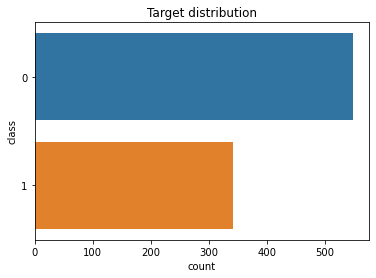

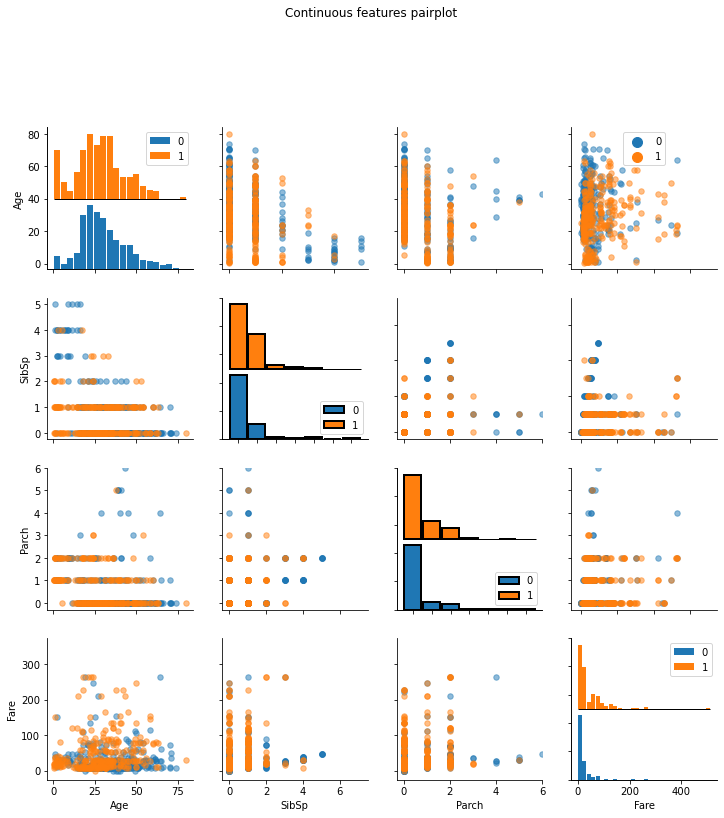

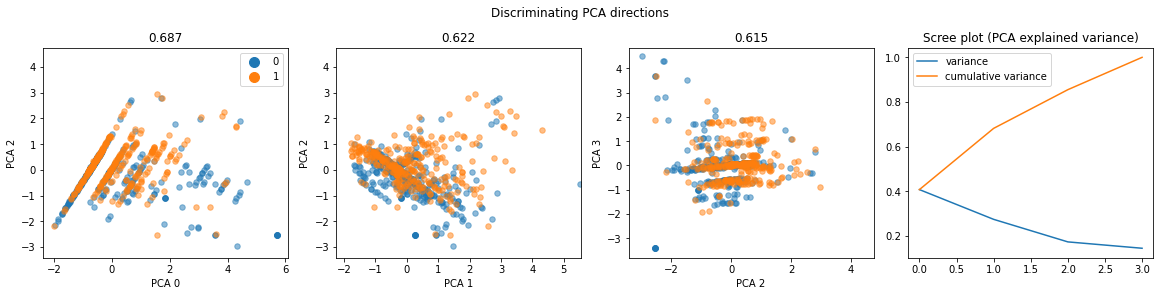

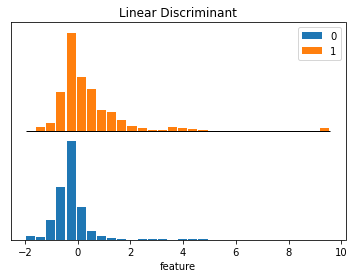

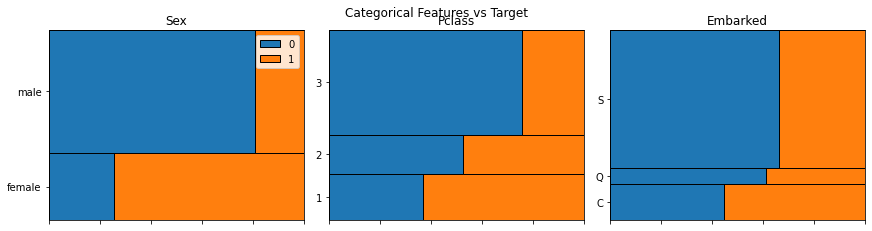

In [4]:
dabl.plot(train_data, target_col="Survived")

* **Target distribution**: The first of the plots shows the distribution of the 'target' feature, in this case `Survived`. This is a very important plot as it gives us an  idea as to whether the classification data is imbalanced or not. In this case the data is somewhat balanced (a 60%:40% split), and using the `accuracy_score` is indeed a reasonable metric when it comes  to measuring just how well we are performing. However, if the data were imbalanced the we would need more advanced techniques and a more sensible way of judging how well our classification is doing. For an overview see the excellent article ["Guide to Classification on Imbalanced Datasets"](https://towardsdatascience.com/guide-to-classification-on-imbalanced-datasets-d6653aa5fa23) by Matthew Stewart.

* **Continuous features plot**: Next we have a $4 \times 4$ matrix of plots for the continuous features, from left to right: `Age`, `SibSp`, `Parch` and `Fare`. On the leading diagonal we have univariate distribution plots for each of the four features, and on the off-diagonal we have scatter plots for each of the pair combinations. Of interest is the `Age` univariate distribution plot: in particular we can see a large orange peak on the far left, this indicates that far more young passengers survived than perished and this is well worth including in our model. In the `SibSp` univariate plot we see that somewhat more couples, or parent with child, survived than perished. In `Parch` and `Fare` we see little difference between the two survival distributions. The pair plots can serve to identify [outliers](https://en.wikipedia.org/wiki/Outlier). It is curious to see in the `Parch/Fare` plot one family of four paid a huge sum for their ticket; either they had very opulent taste, or they were taken for the worst ride ever. 

* **Discriminating PCA directions**: Next are three scatter plots comparing [principal component analysis](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) directions with each other. The [cross-validated](https://en.wikipedia.org/wiki/Cross-validation_&#40;statistics&#41;) macro-average [recall](https://en.wikipedia.org/wiki/Precision_and_recall) of a [decision tree](https://en.wikipedia.org/wiki/Decision_tree) is shown in the title for each scatterplot. The fourth plot is a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) for the PCA [explained variance](https://en.wikipedia.org/wiki/Explained_variation). From this we can see that the principal component alone accounts for 40% of the explained variance. These analyses are useful if we need to perform what is known as [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) to reduce the number of features in our model. However, given the relatively small number of data points in each feature, performing dimensionality reduction via PCA is unlikely to be productive, and it is better to reduce the dimensionality of this problem via feature selection. If you do wish to perform PCA one can use the [Scikit-learn implementation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html).

* **Linear discriminant**: [Linear discriminant analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis) (LDA) is related to principal component analysis. The values along the $x$-axis represent the regression coefficients or weights. The idea here is to see how separable the two target classes (`Survived=0` and `Survived=1`) are using a linear discriminant. We can see from the similarity and relative position of the two histograms that this does not seem to be the case, and performing LDA on the Titanic data would not be a worthwhile exercise. However, if you do wish to try it out see [LDA with Scikit-learn](https://scikit-learn.org/stable/modules/lda_qda.html).

* **Categorical features**: Finally there are three [mosaic plots](https://en.wikipedia.org/wiki/Mosaic_plot), one for each of the three categorical features; in order of importance: `Sex`, `Pcalss`, and `Embarked`. We can see that far fewer males survived (the 1's in orange) than females. These plots tell us quite a lot and indicate that a classification based on `Sex` and `Pclass` may well be a good place to start making a model, which is indeed the case as one can see in the notebook [Titanic: some sex, a bit of class, and a tree...](https://www.kaggle.com/carlmcbrideellis/titanic-some-sex-a-bit-of-class-and-a-tree).

# Pearson correlation matrix
We shall now use [pandas to produce a correlation matrix](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html):

In [5]:
train_data.corr().style.background_gradient(cmap='Oranges')

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


We can see the individual values of the [Pearson standard correlation coefficients](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) in a [correlation matrix](https://en.wikipedia.org/wiki/Correlation_and_dependence).
If there were very highly correlated features (either positive or negative) then we could choose to drop one of them as the other could do most of the explanatory work for us.
We observe  that `Pclass` and `Fare` are anti-correlated, indicating that the First class tickets cost more (!), and that `SibSp` and `Parch` are somewhat correlated, indicating that children were accompanied by adults. We can also see that `Pclass` and `Age` are anti-correlated, indicating that the younger people were in the lower classes. Most importantly is the anti-correlation (-0.34) between `Survived` and `Pclass`, indicating the lower survival rate for people in 3rd class.

# Summary
This preliminary EDA now puts us in a far better position to proceed with any possible [data cleaning](https://en.wikipedia.org/wiki/Data_cleansing), and [dimensionality reduction](https://en.wikipedia.org/wiki/Dimensionality_reduction) via [feature selection](https://www.kaggle.com/carlmcbrideellis/titanic-feature-selection-permutation-importance), for an example see the notebook ["Titanic feature selection: Permutation importance"](https://www.kaggle.com/carlmcbrideellis/titanic-feature-selection-permutation-importance).

We have seen that a good place to start building our model is with `Sex` (women had a far better survival rate), age (children had a better survival rate) and couples also had a better survival rate. Another very important factor is `Pclass` as those who traveled in 1st and 2nd class seemed to fare better than those in 3rd class.

# Relevant books
* John W. Tukey "Exploratory Data Analysis", Pearson (1977)
* Suresh Kumar Mukhiya and Usman Ahmed ["Hands-On Exploratory Data Analysis with Python"](https://www.packtpub.com/product/hands-on-exploratory-data-analysis-with-python/9781789537253), Packt Publishing (2020)

# See also:
* [Titanic: view missing values with missingno](https://www.kaggle.com/carlmcbrideellis/titanic-view-missing-values-with-missingno)
* [Titanic: EDA in one line with 'pandas_profiling'](https://www.kaggle.com/carlmcbrideellis/titanic-eda-in-one-line-with-pandas-profiling)